<a href="https://colab.research.google.com/github/lalopezabc123/csv/blob/main/Trabajando%20con%20R-09-02-2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#091f60">
<h1><b>
Trabajando con R-09-02-2023

</font>

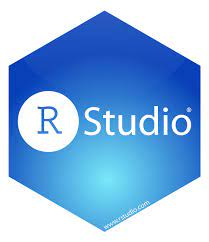

In [48]:
library(tidyverse)

library(modelr)
options(na.action = na.warn)

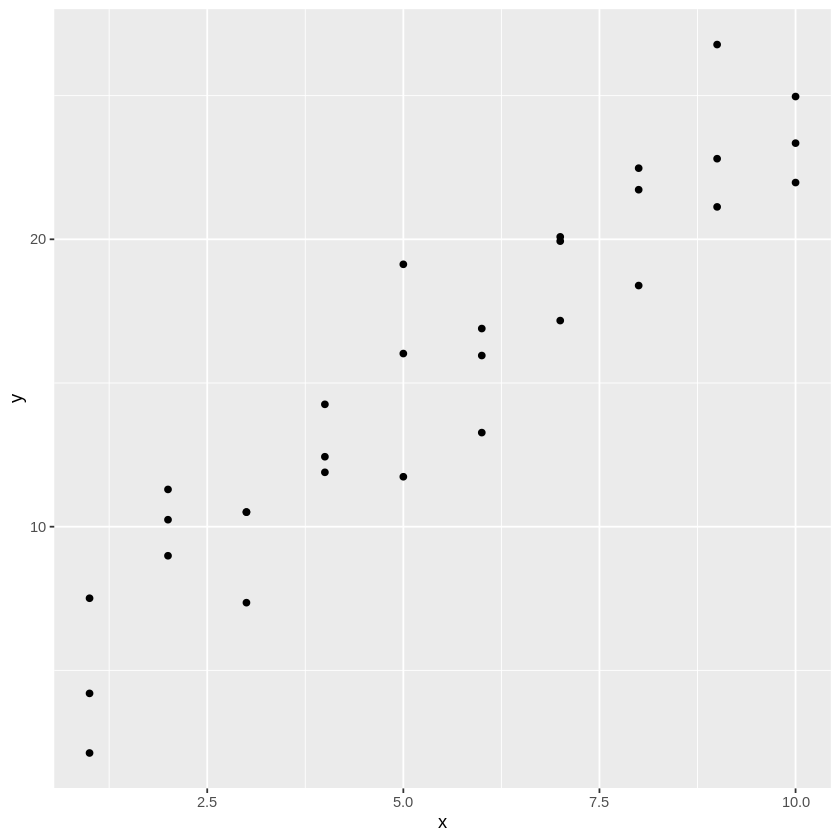

In [49]:
ggplot(sim1, aes(x, y)) + 
  geom_point()

In [50]:
models <- tibble(
  a1 = runif(250, -20, 40),
  a2 = runif(250, -5, 5)
)


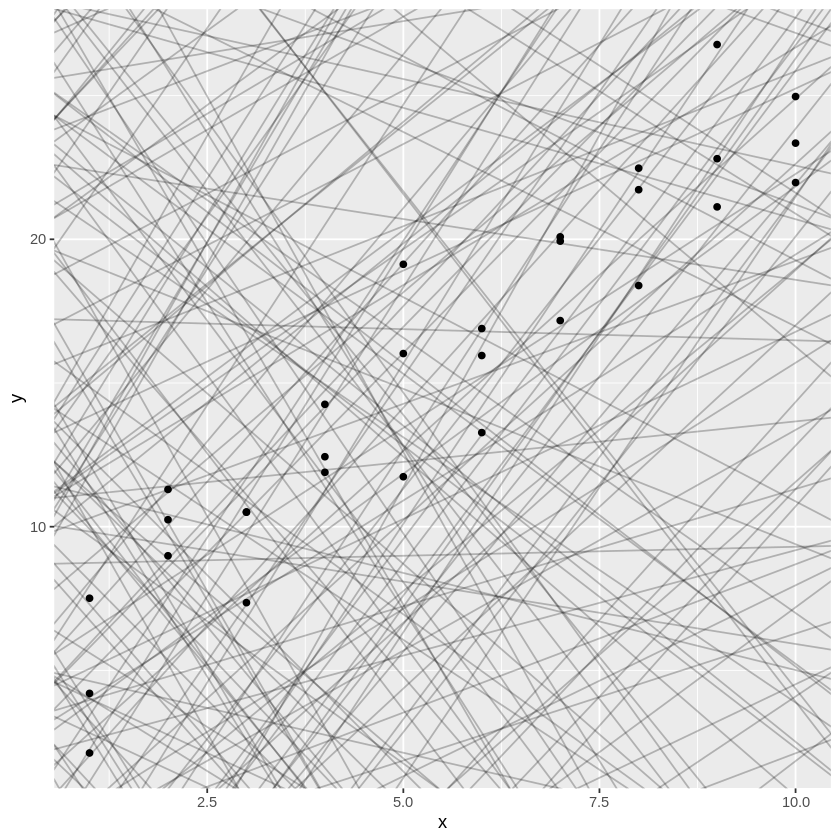

In [51]:
ggplot(sim1, aes(x, y)) + 
  geom_abline(aes(intercept = a1, slope = a2), data = models, alpha = 1/4) +
  geom_point() 

In [52]:
model1 <- function(a, data) {
  a[1] + data$x * a[2]
}
model1(c(7, 1.5), sim1)

[1]  8.5  8.5  8.5 10.0 10.0 10.0 11.5 11.5 11.5 13.0 13.0 13.0 14.5 14.5 14.5
[16] 16.0 16.0 16.0 17.5 17.5 17.5 19.0 19.0 19.0 20.5 20.5 20.5 22.0 22.0 22.0

In [53]:
measure_distance <- function(mod, data) {
  diff <- data$y - model1(mod, data)
  sqrt(mean(diff ^ 2))
}
measure_distance(c(7, 1.5), sim1)
#> [1] 2.665212

[1] 2.665212

In [54]:
sim1_dist <- function(a1, a2) {
  measure_distance(c(a1, a2), sim1)
}

models <- models %>% 
  mutate(dist = purrr::map2_dbl(a1, a2, sim1_dist))
models

a1,a2,dist
<dbl>,<dbl>,<dbl>
26.2765045,-3.64238418,18.914636
0.9898557,-3.46842410,37.205420
8.4213010,4.59106220,19.692824
20.5974877,-3.16304575,19.499701
-0.4616884,0.03528321,16.935759
16.2700838,1.40922559,8.970214
8.2797946,4.27693242,17.636130
17.2611557,-0.07771884,6.610577
35.2202785,4.97564564,47.872665


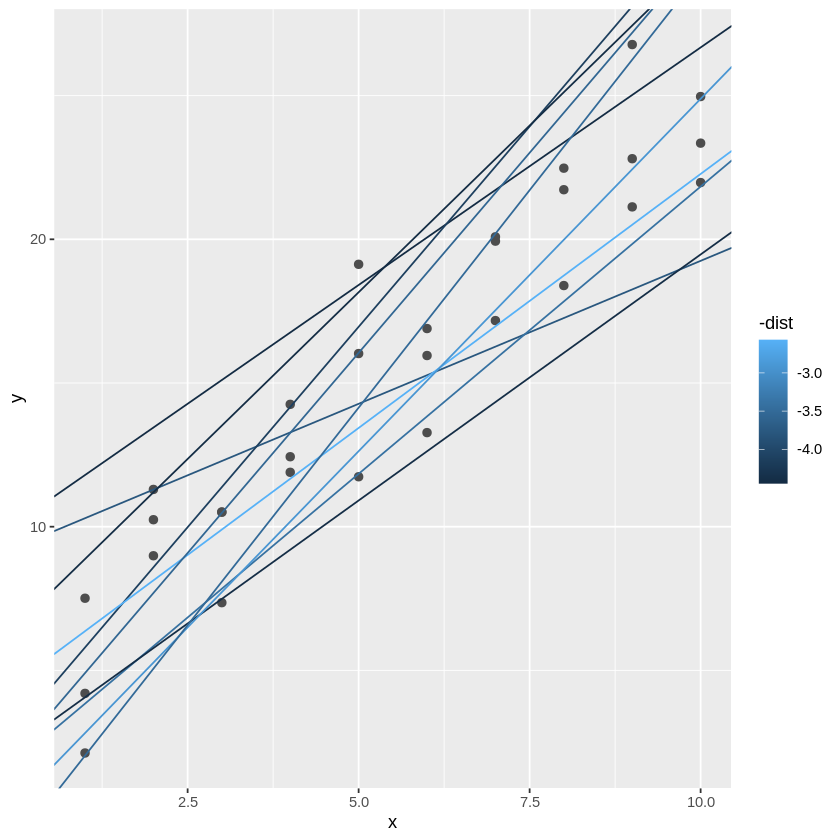

In [55]:
ggplot(sim1, aes(x, y)) + 
  geom_point(size = 2, colour = "grey30") + 
  geom_abline(
    aes(intercept = a1, slope = a2, colour = -dist), 
    data = filter(models, rank(dist) <= 10)
  )

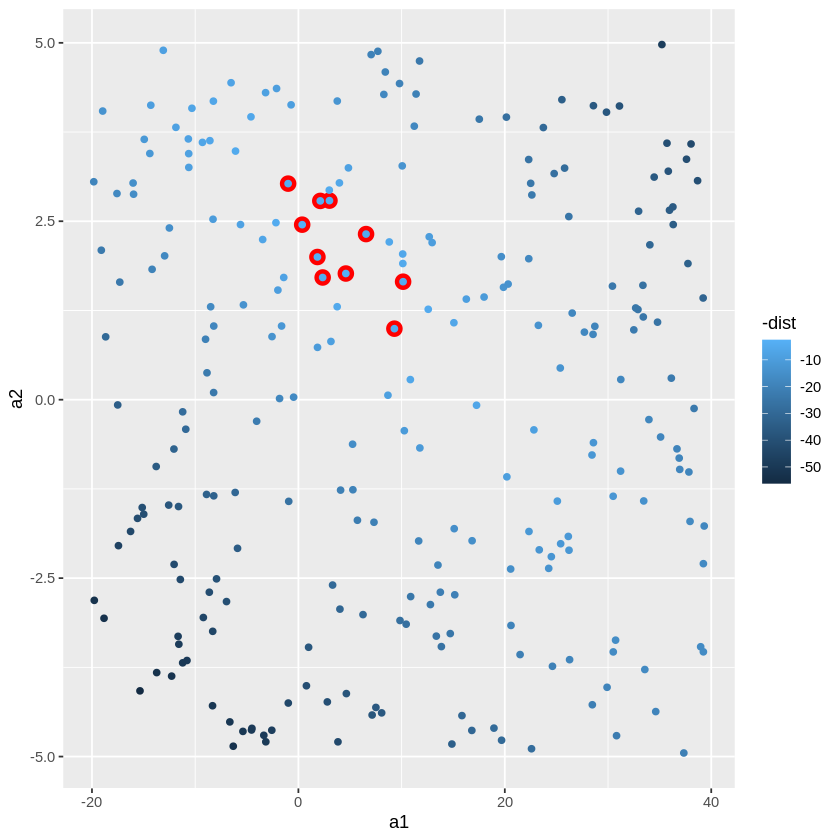

In [56]:
ggplot(models, aes(a1, a2)) +
  geom_point(data = filter(models, rank(dist) <= 10), size = 4, colour = "red") +
  geom_point(aes(colour = -dist))

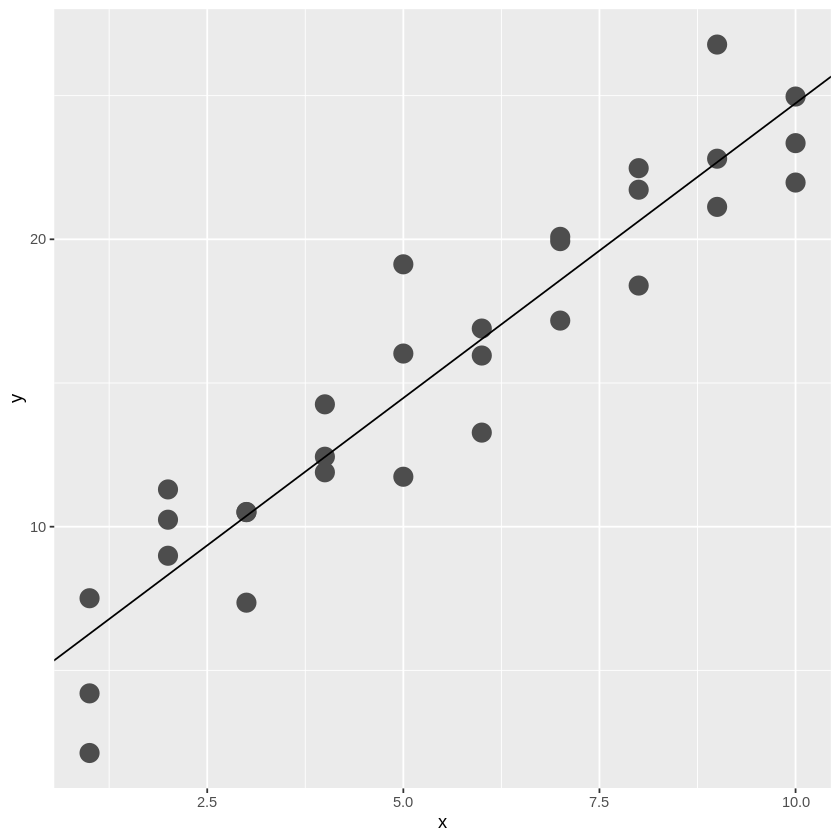

In [114]:
ggplot(sim1, aes(x, y))+
  geom_point(size = 5 , colour = "grey30") +
    geom_abline(intercept = best$par[1], slope = best$par[2])

# Nueva sección

# Introducción a R

R es un lenguaje de programación fácil de aprender. Cuenta con un enfoque simple pero efectivo de lo que se conoce como la programación orientada a objetos. Su principal uso está enfocado a la estadística

## Números y operaciones matemáticas básicas

### Datos numéricos

#### Enteros y decimales

R distingue entre números enteros y decimales. Al escribir un número decimal, el separador entre la parte entera y la parte decimal es un punto.

In [57]:
780.6 # numero con decimal

[1] 780.6

In [58]:
1050 # número entero

[1] 1050

### Usando R como calculadora

Las cuatro operaciones básicas son la suma (+), la resta (-), la multiplicación (*) y la división (/).

*Al hacer operaciones en las que intervienen números enteros y decimales, el resultado es siempre decimal.*

En el caso de que el resultado no tenga parte decimal, R escribe 0 como parte decimal para indicar que el resultado es un número decimal

In [59]:
250 + 350

[1] 600

In [60]:
100 - 20 * 4

[1] 20

In [61]:
(100 - 20 * 4) / 5

[1] 4

#### Potencias y raíces

Las potencias se calculan con el operador $**$, teniendo en cuenta que $x$ $**$ $y$ $=$ $x^y$. Utilizando exponentes negativos o decimales se pueden calcular potencias inversas o raíces n-ésimas.

Si se quiere calcular un valor al cuadrado, por ejemplo $5^2$, entonces...

In [62]:
5 ** 2

[1] 25

O si se quiere calcular la raiz de un número, por ejemplo $\sqrt{9}$
entonces...

In [63]:
9 ** 0.5

[1] 3

## Algunas funciones integradas

Aunque no se puede dar una regla válida en todas las situaciones, normalmente es conveniente redondear el resultado de un cálculo cuando se muestra, sobre todo si tiene muchos decimales, para facilitar su lectura.

Lo que no se debe hacer nunca es redondear resultados intermedios que se vayan a utilizar en cálculos posteriores, porque el resultado final será diferente.

### Redondear: round()

La función integrada round( ) admite uno o dos argumentos numéricos. Cuando tiene dos argumentos numéricos, el segundo argumento indica la posición para evaluar el redondeo.

In [64]:
round(65.35)

[1] 65

In [65]:
round(65.78)

[1] 66

In [66]:
round(78.18467, 3)

[1] 78.185

In [67]:
round(78.18467, 2)

[1] 78.18

### Valor absoluto: abs()

In [68]:
abs(-1500)

[1] 1500

In [69]:
abs(2197)

[1] 2197

### Máximo: max()

La función integrada max( ) calcula el valor máximo de un conjunto de valores (numéricos o alfabéticos). En el caso de cadenas, el valor máximo corresponde al último valor en orden alfabético, sin importar la longitud de la cadena.

In [70]:
max(c(4, 6, -1, 9, 3.5, -12))

[1] 9

In [71]:
max(c("Darío", "Agostina", "Marcelo", "Emiliana", "Veronica"))

[1] "Veronica"

### Mínimo: min()

La función integrada min( ) calcula el valor mínimo de un conjunto de valores (numéricos o alfabéticos). En el caso de cadenas, el valor mínimo corresponde al primer valor en orden alfabético, sin importar la longitud de la cadena.

In [72]:
min(c(4, 6, -1, 9, 3.5, -12))

[1] -12

In [73]:
min(c("Darío", "Agostina", "Marcelo", "Emiliana", "Veronica"))

[1] "Agostina"

### Cantidad de elementos: length()

In [74]:
length(c(4, 6, -1, 9, 3.5, -12, 15, 18))

[1] 8

### Media: median()

In [75]:
median(c(4, 6, -1, 9, 3.5, -12))

[1] 3.75

### Desviación estandar: sd()

In [76]:
round(sd(c(4, 6, -1, 9, 3.5, -12)),3)

[1] 7.419

# Creación y asignación de variables

El concepto de "variable" proviene de las Matemáticas. En Matemáticas, una variable es un símbolo que forma parte de una expresión o de una fórmula.

Normalmente las variables se representan mediante letras del alfabeto latino ( $x, y, z, n, i, j,$ etc.). Dependiendo del contexto, las variables significan cosas distintas.

En R las variables son "etiquetas" que permiten hacer referencia a los datos (que se guardan en unas "cajas" llamadas objetos).

R es un lenguaje de programación orientado a objetos y su modelo de datos también está basado en objetos. Para cada dato que aparece en un script, R crea un objeto que lo contiene. 

**Cada objeto tiene:**

- Un identificador único (un número entero, distinto para cada objeto). El identificador permite a R referirse al objeto sin ambigüedades.
- Un tipo de datos (entero, decimal, cadena de caracteres, etc.). El tipo de datos permite saber a R qué operaciones pueden hacerse con el dato.
- Un valor (el propio dato).

Así, las variables en R no guardan los datos, sino que son simples nombres para poder hacer referencia a esos objetos. 

**Los nombres de variables no pueden incluir espacios en blanco.**

## Variables numéricas

In [77]:
num1 <- 2
num2 <- 175.5
num1 + num2

[1] 177.5

In [78]:
num1 * num2

[1] 351

In [79]:
num2 / num1

[1] 87.75

In [80]:
num2 - num1

[1] 173.5

In [81]:
num3 <- num1 + num2
num3

[1] 177.5

# Permanencia de datos y eliminación de objetos

R crea y manipula objetos. Pueden ser variables, matrices, cadenas de caracteres, funciones o estructuras de datos más generales construidas a partir de dichos componentes.

Para ver los objetos creados en la sesión...

In [82]:
a <- c(1,2,3)

In [83]:
objects()

[1] "a"                "a3"               "measure_distance" "model1"          
[5] "models"           "num1"             "num2"             "num3"            
[9] "sim1_dist"

Para eliminar objetos está disponible la función rm(), y entre los parentesis, los objetos a eliminar

In [84]:
rm(a)

In [85]:
objects()

[1] "a3"               "measure_distance" "model1"           "models"          
[5] "num1"             "num2"             "num3"             "sim1_dist"

# Tipos de datos

## Vector

R opera sobre estructuras de datos. La estructura más simple de este tipo es el vector numérico, que es una entidad única  de una colección ordenada de números. 

Para crear un vector llamado x, de cinco números, por ejemplo 10.6, 15.6, 35.1, 63.4 y 21.7, se usa el comando combinar...

In [86]:
x <- c(10.6, 15.6, 35.1, 63.4, 21.7)

In [87]:
x

[1] 10.6 15.6 35.1 63.4 21.7

Esta es una declaración de asignación que usa la función c() que puede tomar un número $n$ de elementos y cuyo valor es un vector obtenido al concatenar sus $n$ elementos de un extremo a otro.

Observe que el operador de asignación $<-$, que consta de dos caracteres $<$ (menor que) y $-$ (menos) apuntan al objeto que recibe el valor de la expresión. 

En la mayoría de los contextos, el operador $=$ se puede utilizar como alternativa.

Otro ejemplo:

In [88]:
y = c(5.4, 12.5, 23.65, 26.89, 54)

In [89]:
y

[1]  5.40 12.50 23.65 26.89 54.00

### Generando secuencias

R puede generar secuencias de números de uso común. 

Por ejemplo, $1:30$ es el vector $c (1, 2, ..., 29, 30)$. 

El operador de dos puntos tiene alta prioridad dentro de una expresión, por lo que, por ejemplo, $2 \times 1: 15$ es el vector $c (2, 4, ..., 28, 30)$.

In [90]:
s1 <- 1:30

In [91]:
s1

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30

La función seq() se utiliza para generar secuencias. 

Tiene cinco argumentos. Los dos primeros argumentos, si se dan, especifican el principio y el final de la secuencia, y si estos son los únicos dos argumentos dados, el resultado es el mismo que el operador de dos puntos. 

Eso es seq (2,10)es el mismo vector que 2:10

In [92]:
s2 = seq(1,30)
s2

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30

Los argumentos o parámetros de la función seq(), también se pueden establecer por su nombre, en cuyo caso el orden en el que aparecen es irrelevante. 

Los dos primeros argumentos se pueden nombrar desde = valor y hasta = valor; por lo tanto, seq (1,30), seq (from = 1, to = 30) y seq (to = 30, from = 1) son todos iguales a 1:30. 

Los siguientes dos parámetros de seq() pueden ser nombrados by = value y lenght = value, que especifican un tamaño y la longitud para la secuencia, respectivamente. 

Si no se da ninguno de estos, se asume el valor predeterminado = 1.

In [93]:
s3 <- seq(-5, 5, by = .5)
s3

[1] -5.0 -4.5 -4.0 -3.5 -3.0 -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0
[16]  2.5  3.0  3.5  4.0  4.5  5.0

![UNI](https://posgrado.uni.edu.ni/wp-content/uploads/2017/02/logo_opt-2.png)